<a href="https://colab.research.google.com/github/Ronin1289/Generating-Building-Drawings-Using-Image-Processing/blob/Experiments/EXPERIMENT_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Refined LSD
##Tuning the lsd for better lines

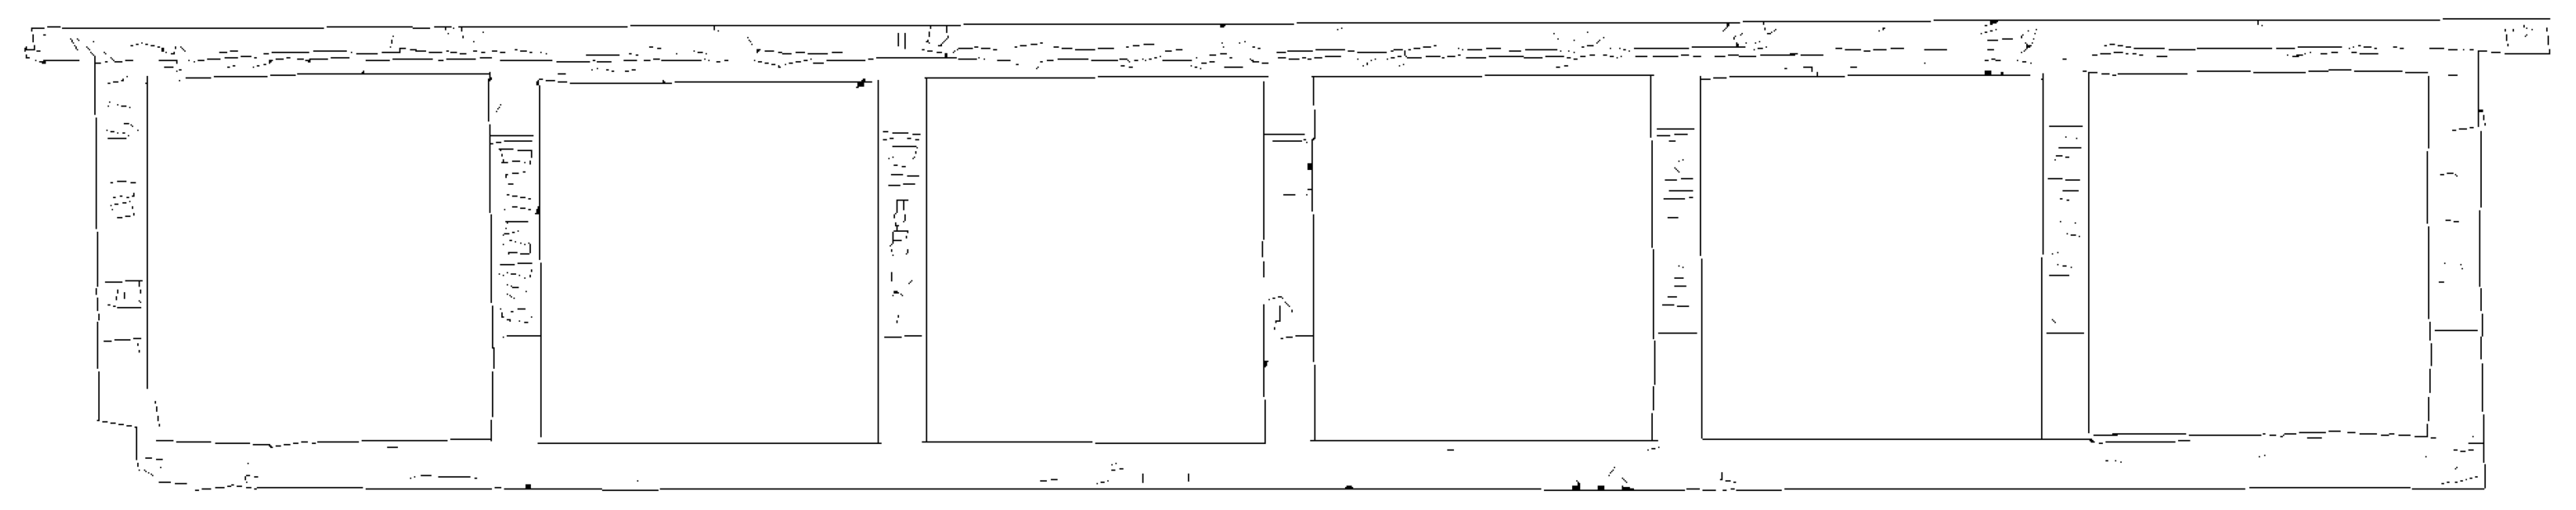

In [ ]:
disp(dil(clsd(img2),3))


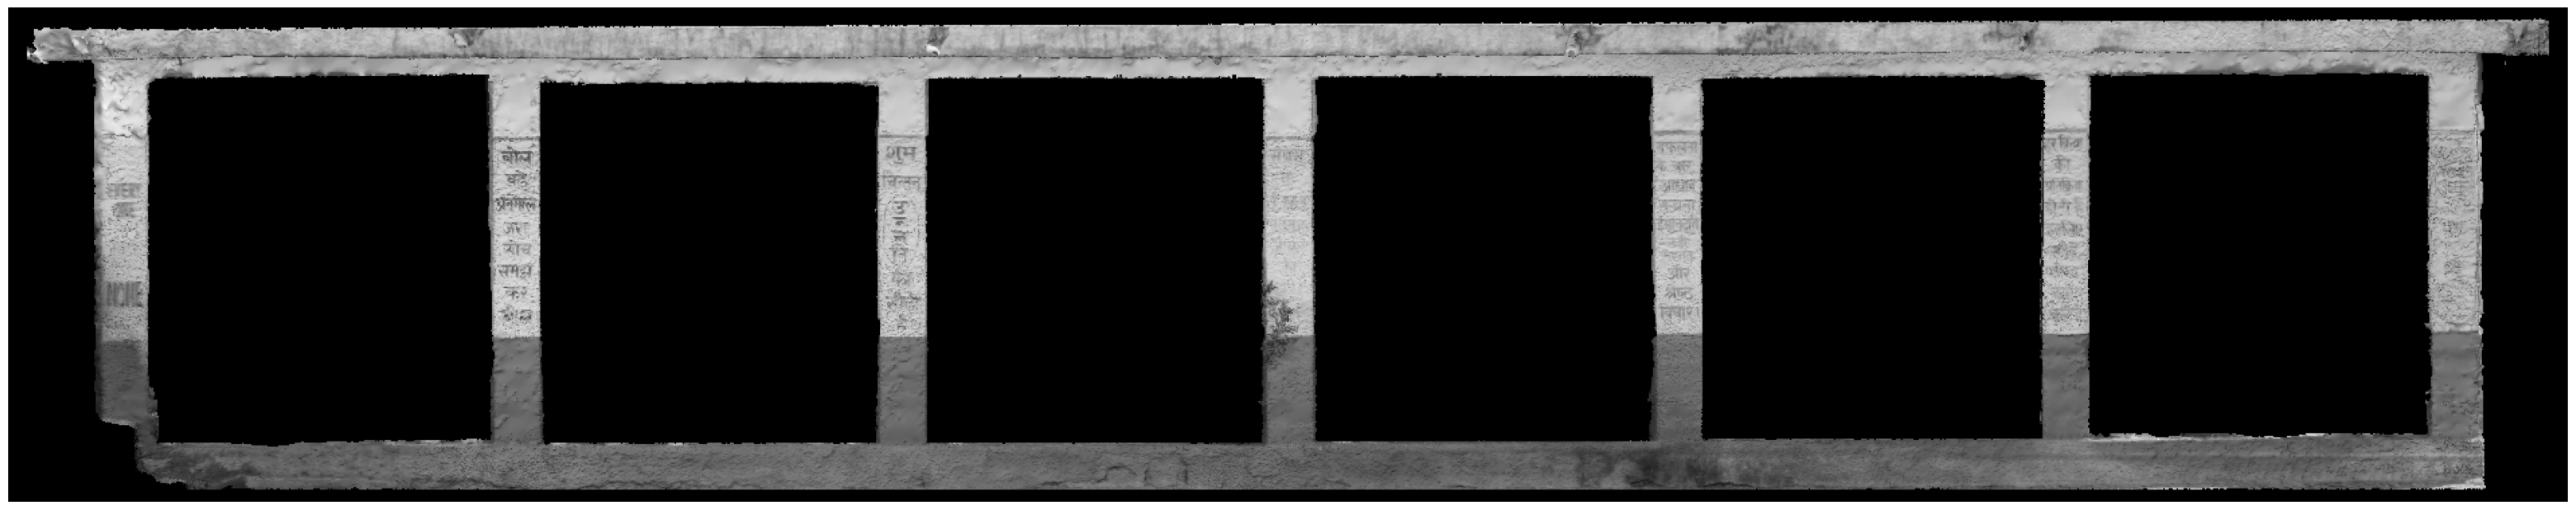

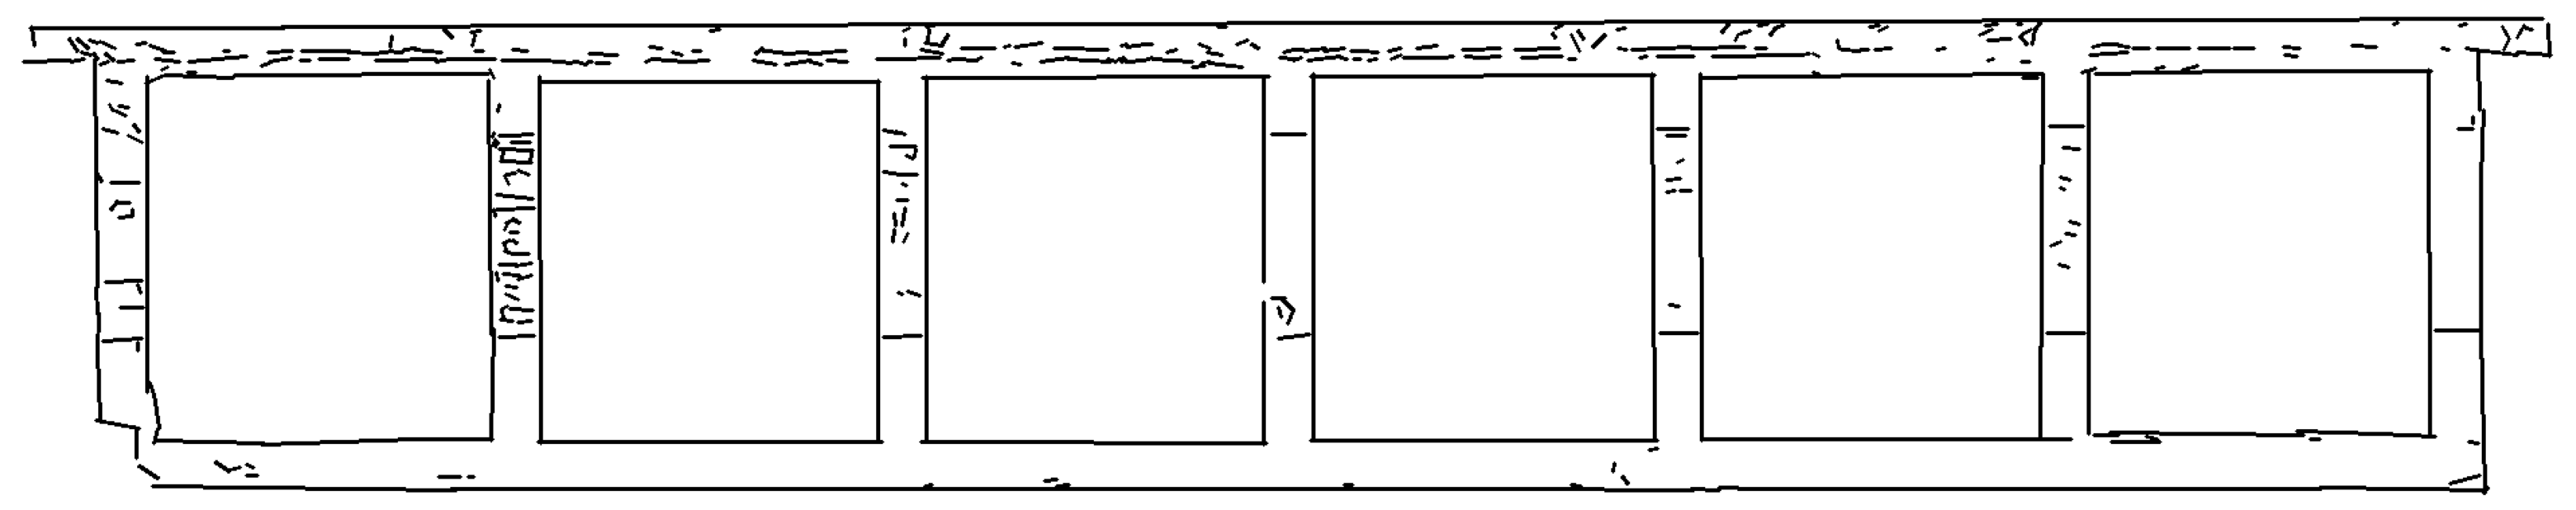

In [ ]:
disp(img2)

disp(clsd(gb(img2)))

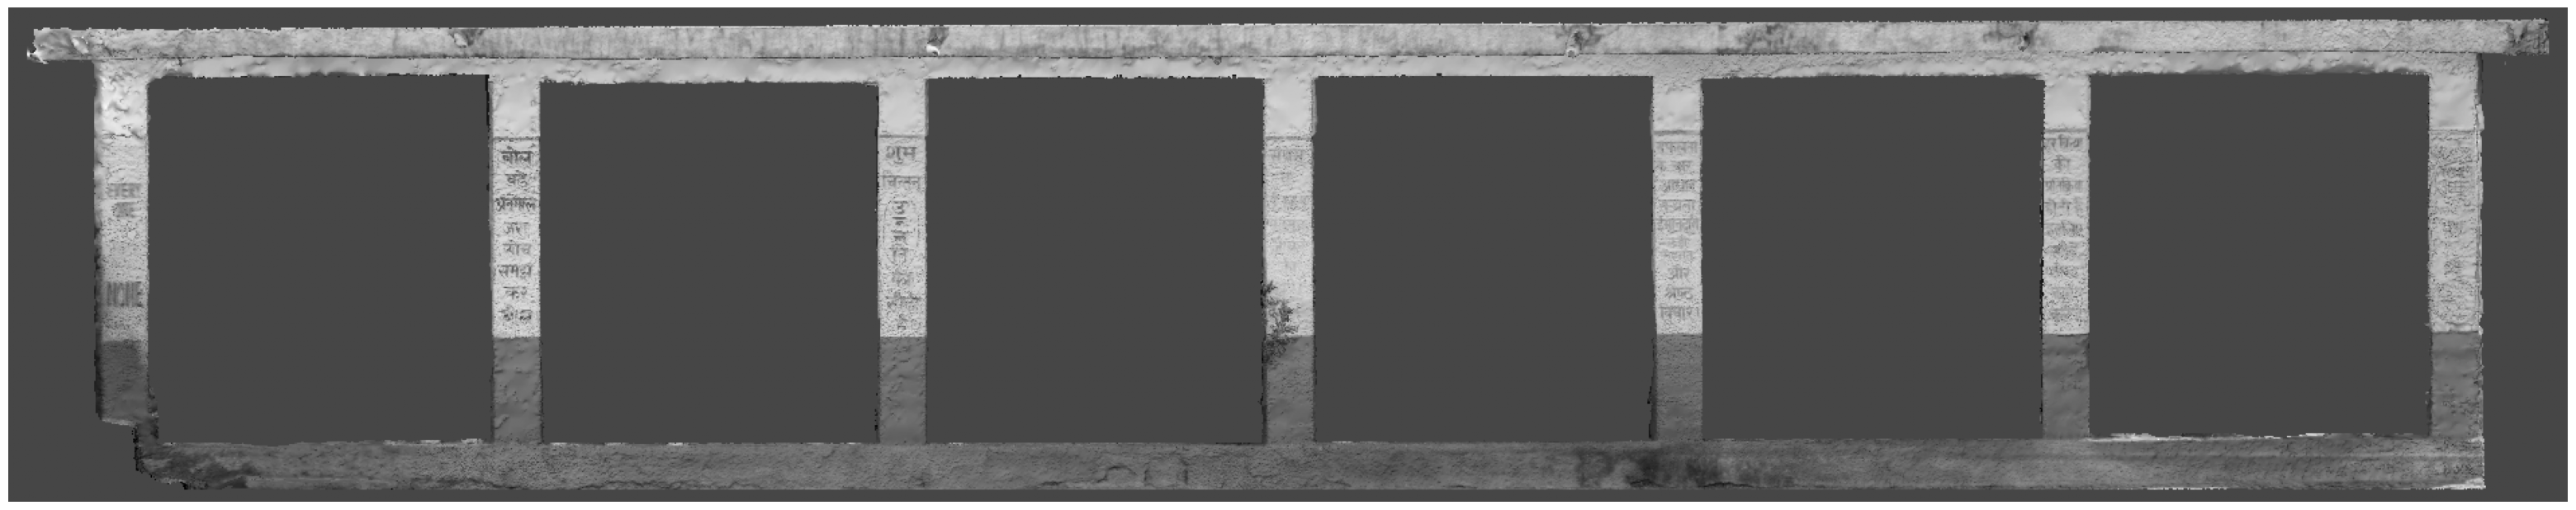

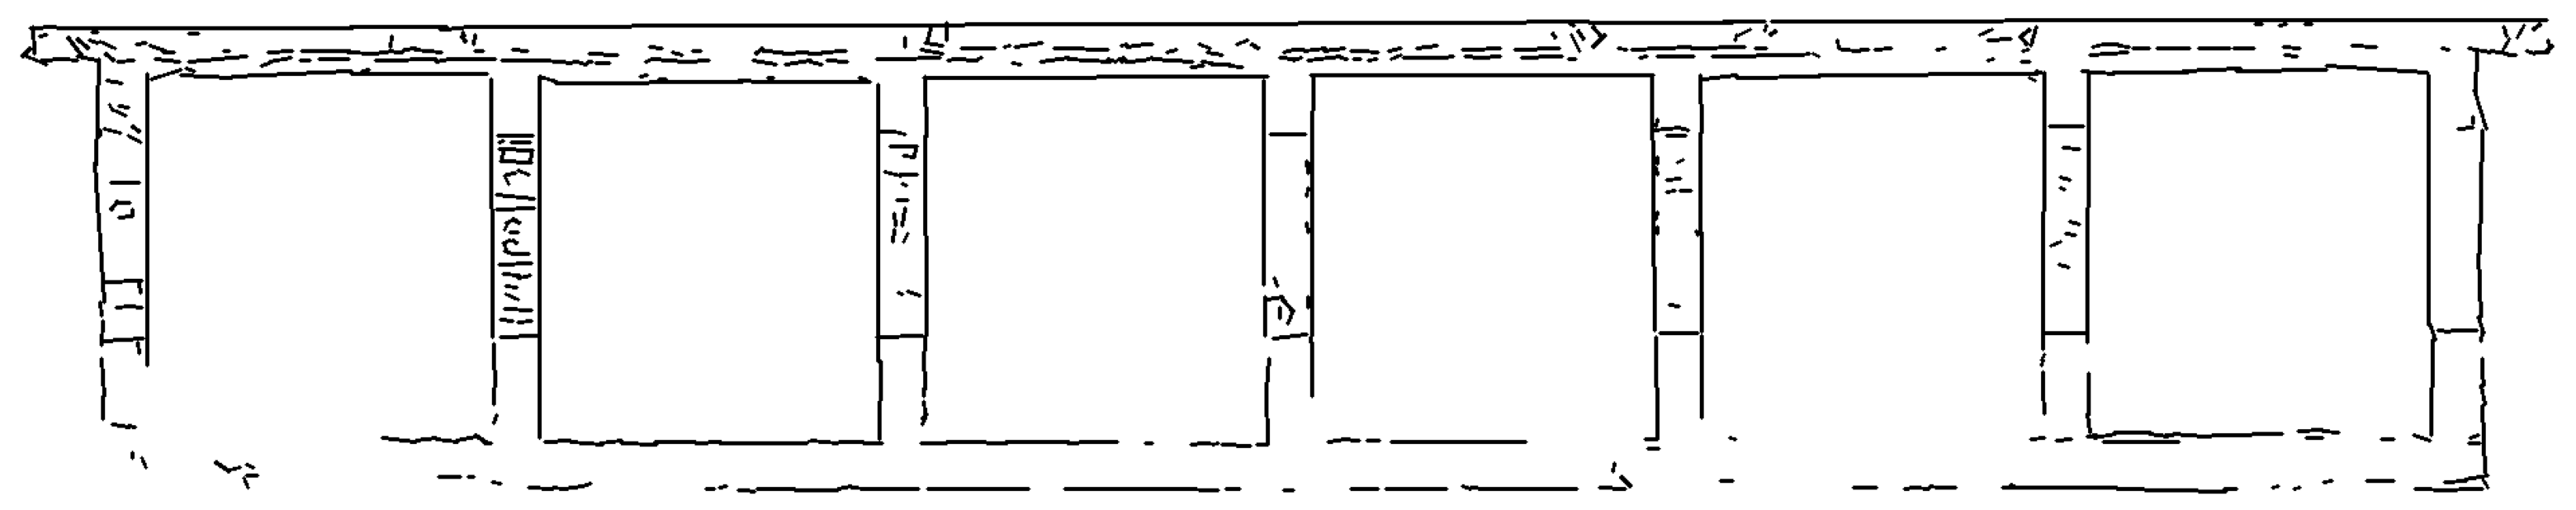

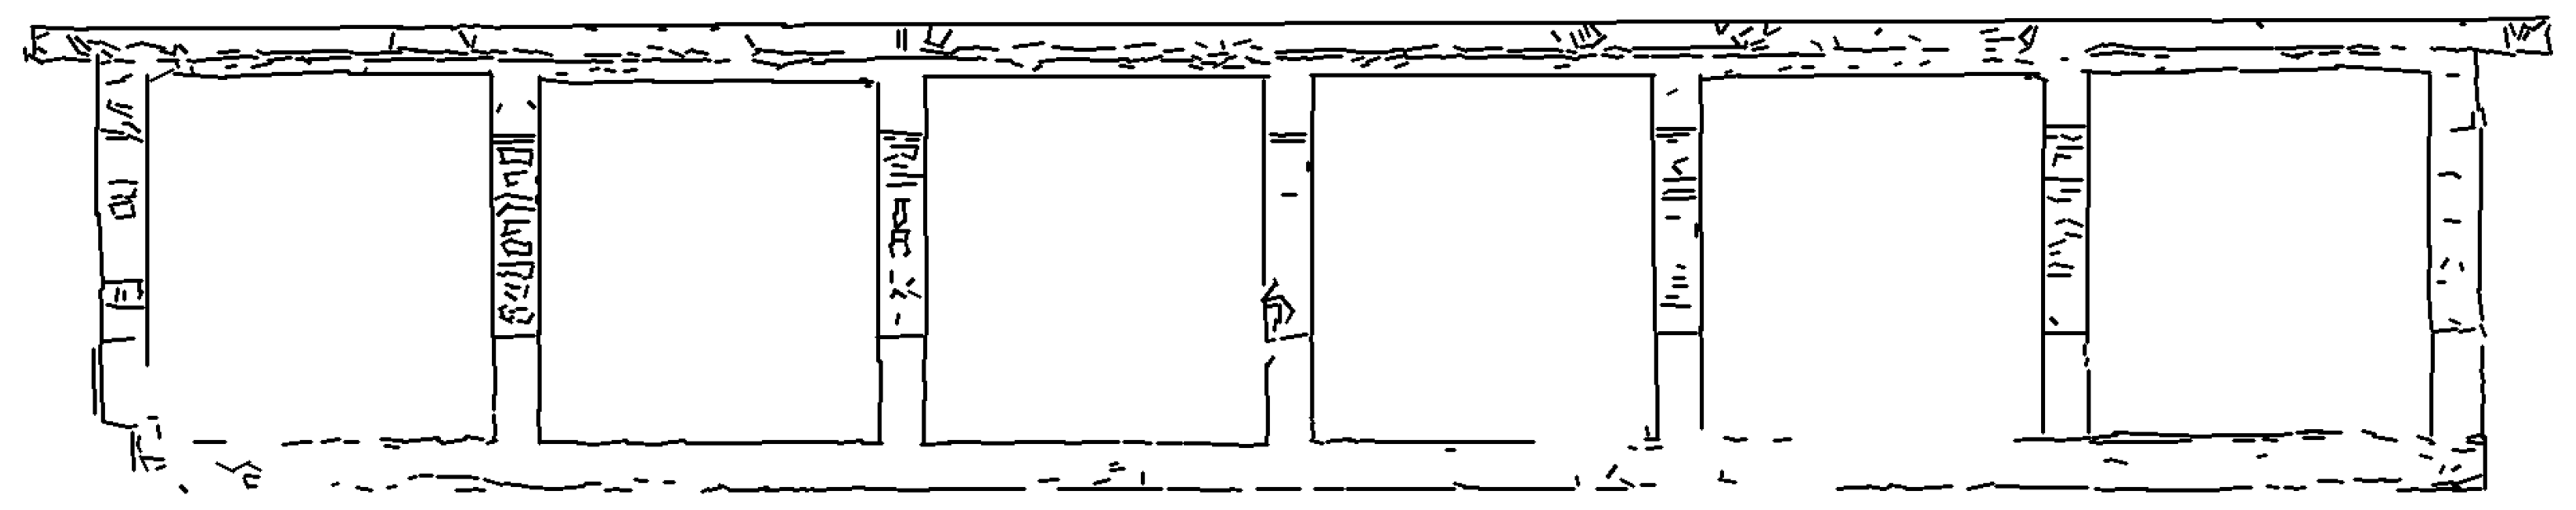

In [ ]:
disp(img)


refine=cv2.LSD_REFINE_ADV      #The way found lines will be refined, see LineSegmentDetectorModes

scale=1.0                      #The scale of the image that will be used to find the lines. Range (0..1].

sigma_scale=1.0                #Sigma for Gaussian filter. It is computed as sigma = sigma_scale/scale.

quant=0.5                      #Bound to the quantization error on the gradient norm.

ang_th=20.0                    #Gradient angle tolerance in degrees.

density_th=0.7  	             #Minimal density of aligned region points in the enclosing rectangle.


disp(clsdp(gb(img),refine,scale,sigma_scale,quant,ang_th,density_th))

refine=cv2.LSD_REFINE_ADV      #The way found lines will be refined, see LineSegmentDetectorModes

scale=1.0                      #The scale of the image that will be used to find the lines. Range (0..1].

sigma_scale=1.0                #Sigma for Gaussian filter. It is computed as sigma = sigma_scale/scale.

quant=0.5                      #Bound to the quantization error on the gradient norm.

ang_th=90.0                    #Gradient angle tolerance in degrees.

density_th=0.7  	             #Minimal density of aligned region points in the enclosing rectangle.


disp(clsdp(img,refine,scale,sigma_scale,quant,ang_th,density_th))

Gray


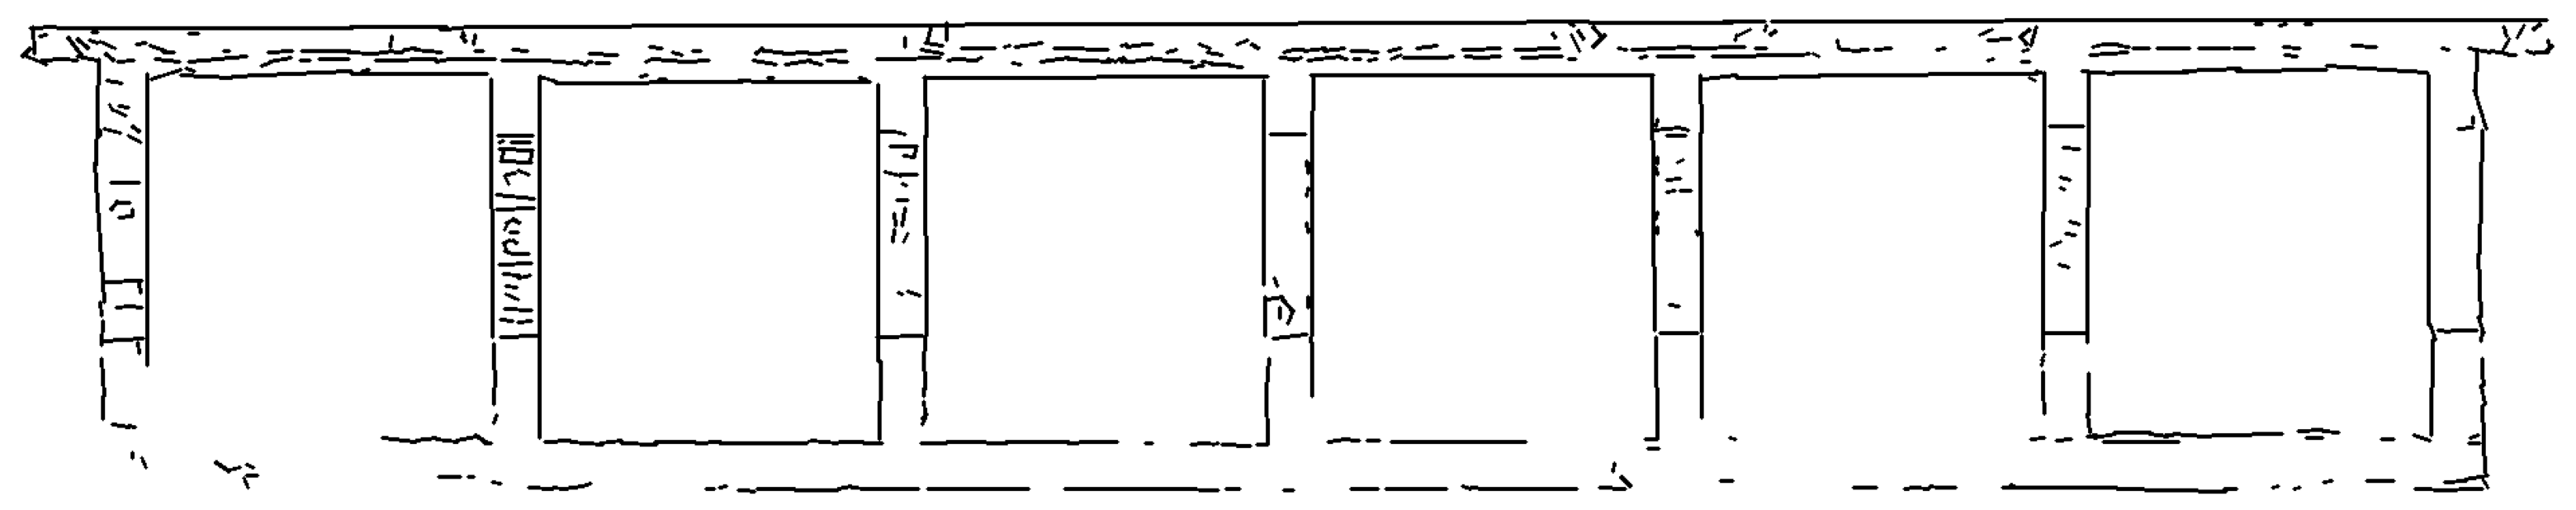

Green


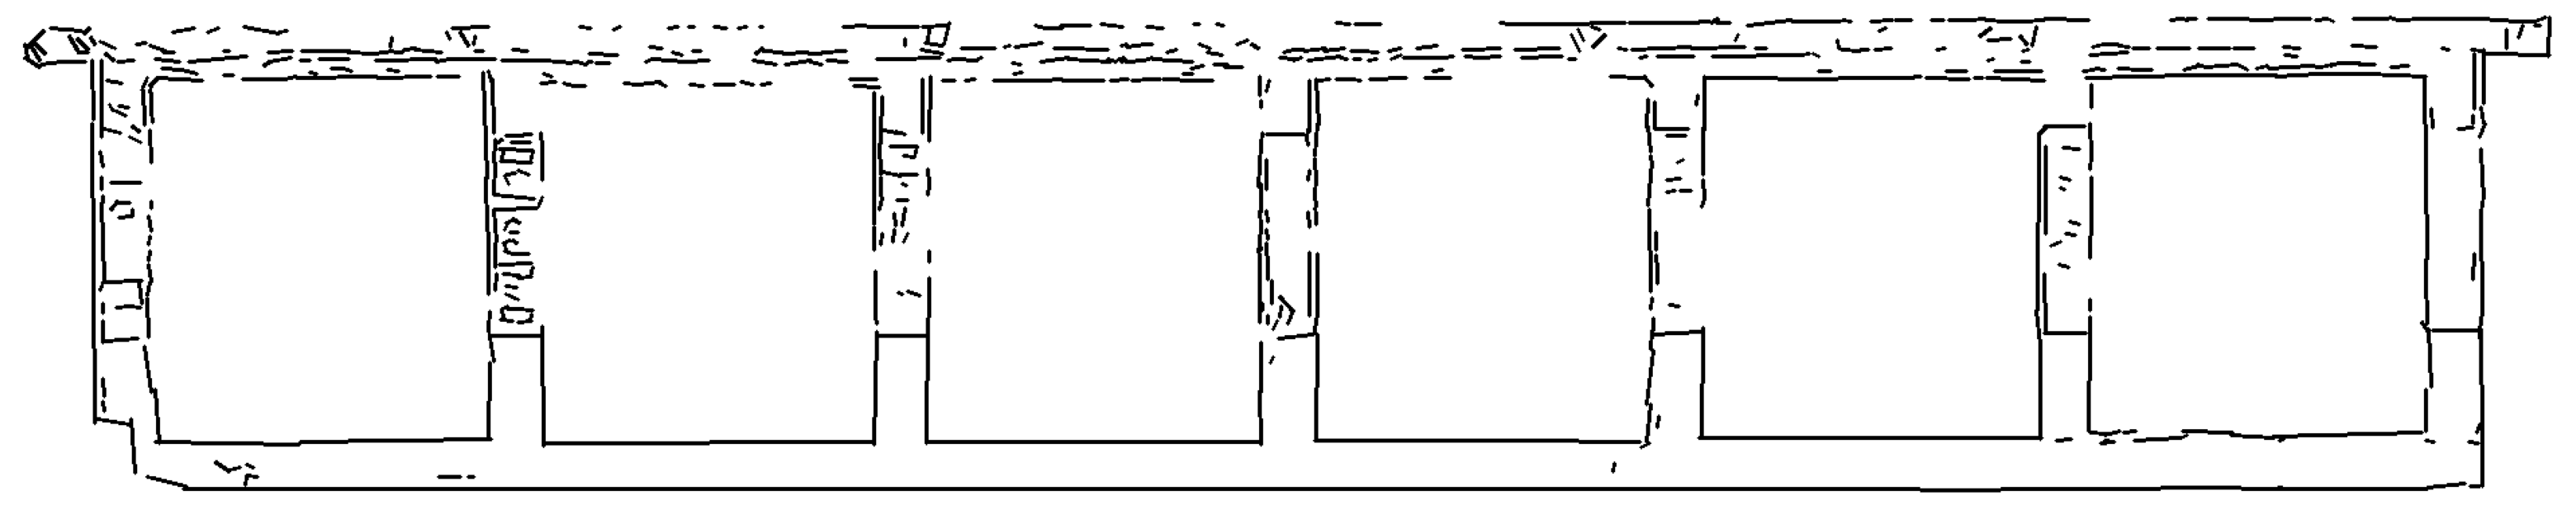

Black


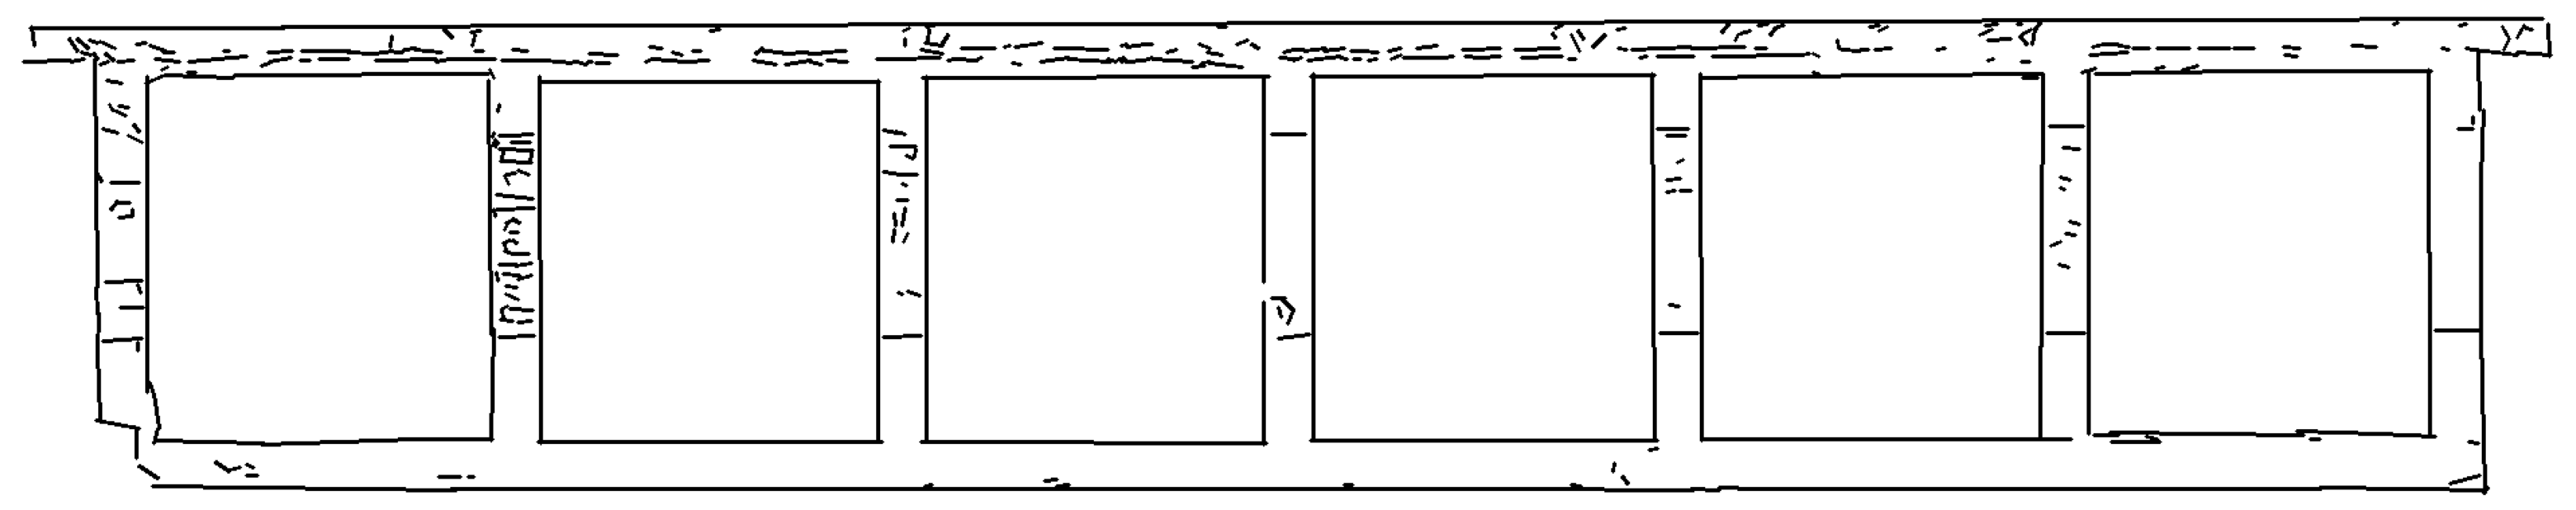

White


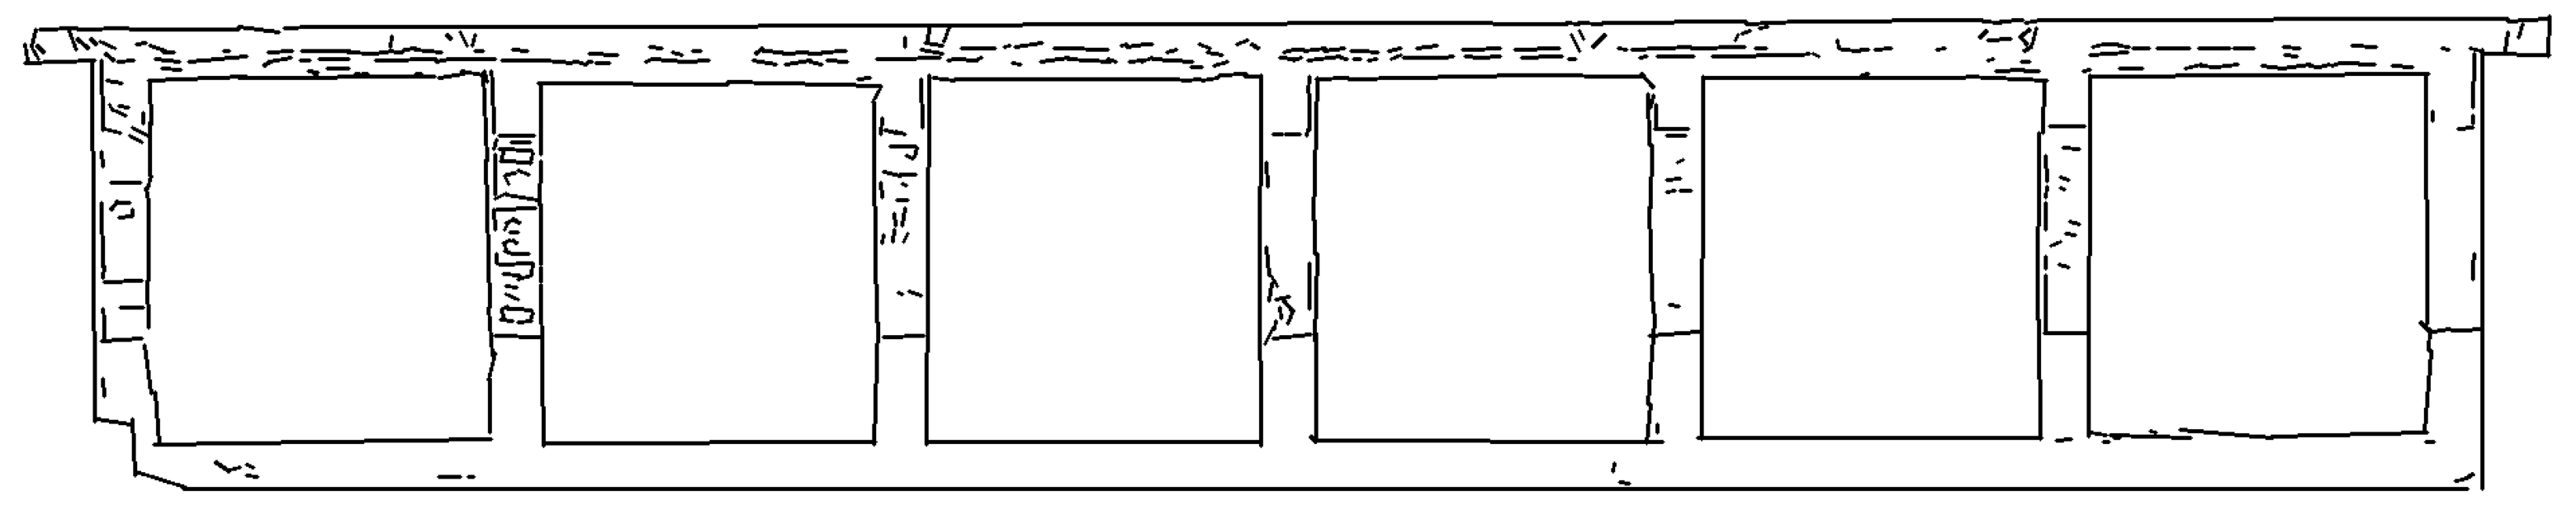

In [ ]:
# disp(img)

# disp(img1)

# disp(img2)

# disp(img3)

print("Gray")

disp(clsdp(gb(img),refine,scale,sigma_scale,quant,ang_th,density_th))

print("Green")

disp(clsdp(gb(img1),refine,scale,sigma_scale,quant,ang_th,density_th))

print("Black")

disp(clsdp(gb(img2),refine,scale,sigma_scale,quant,ang_th,density_th))

print("White")

disp(clsdp(gb(img3),refine,scale,sigma_scale,quant,ang_th,density_th))


##Importing Libraries

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
# import svgwrite
# import ezdxf
# import svgpathtools
from google.colab import files
from skimage.morphology import skeletonize

##Loading Images

In [ ]:
img=cv2.imread('/content/drive/MyDrive/DATASETS/gsck1.png',cv2.IMREAD_GRAYSCALE)
img1=cv2.imread('/content/drive/MyDrive/DATASETS/gsck2.png',cv2.IMREAD_GRAYSCALE)
img2=cv2.imread('/content/drive/MyDrive/DATASETS/gsck3.png',cv2.IMREAD_GRAYSCALE)
img3=cv2.imread('/content/drive/MyDrive/DATASETS/gsck4.png',cv2.IMREAD_GRAYSCALE)

##Custom Edge Detector

In [ ]:
def ced(img):
  #kernel = np.ones((3,3), np.uint8)
  kernel2=np.ones((1,1), np.uint8)
  kernel = np.ones((1,1), np.uint8)

  a=1
  if(a!=0):
    im1=cv2.GaussianBlur(img,(7,7),0)

  im1=255-cv2.Canny(im1,40,120)

  dilated = cv2.dilate(im1, kernel, iterations=1)

  eroded = cv2.erode(im1, kernel, iterations=1)

  dilated = cv2.dilate(eroded, kernel2, iterations=1)

  return dilated


##Custom LSD

In [ ]:
def clsdp(img,refine,scale,sigma_scale,quant,ang_th,density_th):
# Tuned LSD Detector
  # https://docs.opencv.org/4.x/dd/d1a/group__imgproc__feature.html#gae0bba3b867a5f44d1b823aef4f57ee8d
  lsd = cv2.createLineSegmentDetector(
      refine=cv2.LSD_REFINE_ADV,
      scale=1.8,
      sigma_scale=1.9,
      quant=2.0,
      ang_th=45.0,
      density_th=0.7
  )

  # Detect lines
  lines = lsd.detect(img)[0]

  # Create an empty image
  lines_img = np.zeros_like(img)

  # Draw white lines on a black background
  for line in lines:
      x1, y1, x2, y2 = map(int, line[0])
      cv2.line(lines_img, (x1, y1), (x2, y2), 255, 2)

  return (255-lines_img)




##Default LSD

In [ ]:
def clsd(img):
# Tuned LSD Detector
  #https://docs.opencv.org/4.x/dd/d1a/group__imgproc__feature.html#gae0bba3b867a5f44d1b823aef4f57ee8d
  lsd = cv2.createLineSegmentDetector(
      refine=cv2.LSD_REFINE_ADV,
      scale=1.8,
      sigma_scale=1.9,
      quant=2.0,
      ang_th=45.0,
      density_th=0.7
  )

  # Detect lines
  lines = lsd.detect(img)[0]

  # Create an empty image
  lines_img = np.zeros_like(img)

  # Draw white lines on a black background
  for line in lines:
      x1, y1, x2, y2 = map(int, line[0])
      cv2.line(lines_img, (x1, y1), (x2, y2), 255, 2)

  return (255-lines_img)




##Display Function

In [ ]:
def disp(img):
  # Display results
  plt.figure(figsize=(40, 40))
  plt.imshow(img, cmap="gray")
  plt.axis("off")
  plt.show()

##Skeletonize

In [ ]:

def skel(img):
    # Convert to binary (ensure input is binary)
    _, binary = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
    binary = binary // 255  # Convert to 0 and 1
    skeleton = skeletonize(binary)
    return (skeleton * 255).astype(np.uint8)  # Convert back to 0-255


##Gaussian Blur

In [ ]:
def gb(img):
  return cv2.GaussianBlur(img,(9,9),0)

##Thinning

In [ ]:
def thin(img):

  _, binary = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

  # Apply thinning
  thinned = cv2.ximgproc.thinning(binary)

  return thinned

##Dilation

In [ ]:
def dil(img, kernel_size):
    kernel = np.ones((kernel_size, kernel_size), np.uint8)
    dilated = cv2.dilate(img, kernel, iterations=1)
    return dilated


##Erosion

In [ ]:

def erd(img, kernel_size):
    kernel = np.ones((kernel_size, kernel_size), np.uint8)
    eroded = cv2.erode(img, kernel, iterations=1)
    return eroded